In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [72]:
from scipy import stats

In [73]:
data = np.genfromtxt('movieReplicationSet.csv', delimiter = ',', skip_header = 1)

In [74]:
df=pd.read_csv('movieReplicationSet.csv')
df2=df.copy()

# Question 1

Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? 

After performing a median split of the data, we can see that the median ratings turn out to be 197.5. Since we cannot reduce our data to the sample mean, we use the Mann Whitney U test. The reason for not reducing our data to sample mean is because that would imply that the psychological distance between any two ratings is the same. After running the test, we get a p value of 0, which is statistically significant. This implies we have reason to conclude that popular movies are rated differently than less popular movies.


Median calculation of the ratings

In [6]:
df.iloc[:,:400].count().median()

197.5

Segregating into popular and not popular movies

In [7]:
pop=df.iloc[:,2]
n_pop=df.iloc[:,0]
for i in range(1,400):
    if df.iloc[:,i].count()>=df.iloc[:,:400].count().median():
        temp=df.iloc[:,i]
        pop=pd.concat([temp,pop],axis=1)
    

In [8]:
pop

,Anaconda (1997),Harry Potter and the Chamber of Secrets (2002),Jaws (1975),The Mask (1994),X-Men 2 (2003),Harry Potter and the Goblet of Fire (2005),The Mummy (1999),Gladiator (2000),Groundhog Day (1993),Inception (2010),...,American Beauty (1999),The Fast and the Furious (2001),A Nightmare on Elm Street (1984),King Kong (1976),Black Swan (2010),Fargo (1996),Indiana Jones and the Last Crusade (1989),Alien (1979),Django Unchained (2012),Django Unchained (2012)
0,NaN,0.5,4.0,NaN,NaN,0.0,NaN,NaN,NaN,3.0,...,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,4.0,4.0
1,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1.5
2,NaN,3.5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.5,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.5,...,3.5,NaN,NaN,NaN,4.0,NaN,3.0,NaN,2.0,2.0
4,NaN,NaN,NaN,3.0,2.5,NaN,1.0,NaN,2.0,3.5,...,NaN,2.5,NaN,0.0,0.0,1.0,0.5,NaN,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,3.0,4.0,...,2.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN
1093,3.5,3.5,3.5,4.0,4.0,3.5,4.0,NaN,4.0,3.0,...,NaN,4.0,3.5,3.5,3.5,NaN,4.0,NaN,NaN,NaN
1094,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.5,NaN,3.0,...,2.5,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
1095,NaN,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.5,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
p=pop.to_numpy()

In [10]:
 p = p[np.isfinite(p)]

In [11]:
for i in range(3,400):
    if df.iloc[:,i].count()<df.iloc[:,:400].count().median():
        temp=df.iloc[:,i]
        n_pop=pd.concat([temp,n_pop],axis=1)

In [12]:
n_pop

,Look Who's Talking (1989),MacArthur (1977),Twister (1996),Patton (1970),The Usual Suspects (1995),My Father and My Son (2005),Gods and Generals (2003),Runaway Bride (1999),The Descent (2005),On Golden Pond (1981),...,The Others (2001),Man on Fire (2004),Night of the Living Dead (1968),Change of Habit (1969),Brazil (1985),The Machinist (2004),Let the Right One In (2008),Rambo: First Blood Part II,Snatch (2000),The Life of David Gale (2003)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.5,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,4.0,4.0,4.0,4.0,NaN,3.5,4.0,3.5,3.0,4.0,...,3.5,4.0,3.5,3.5,3.5,NaN,3.5,2.5,4.0,3.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminating NaNs

In [13]:
n_p=n_pop.to_numpy()

In [14]:
n_p

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [15]:
d=n_p[np.isfinite(n_p)]
d

array([4. , 2.5, 0. , ..., 4. , 4. , 1. ])

In [17]:
a1,p1 = stats.mannwhitneyu(d,p)
p1

0.0

# Question 2

Are movies that are newer rated differently than movies that are older?

After performing a median split of the data, we can see that the median year turned out to be 1999. Since we cannot reduce our data to the sample mean, we use the Mann Whitney U test. After running the test, we get a p value of 0.0019, which is statistically significant. This implies we have reason to conclude that newer movies are rated differently than older movies.


Median Calculation of the year

In [84]:
df.rename(columns={'Rambo: First Blood Part II': 'Rambo: First Blood Part II (1985)'}, inplace=True)

In [85]:
df_col= [col[-6:] for col in df.columns]

In [86]:
years=df_col[:400]

In [87]:
year=[i[1:5] for i in years ]

In [88]:
year=[int(i) for i in year]

In [89]:
from statistics import median
median(year)

1999.0

In [90]:
df=df.iloc[:,:400]

In [91]:
df.loc['year']=year

In [92]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
1096,NaN,NaN,4.0,NaN,2.5,NaN,NaN,3.0,NaN,3.5,...,NaN,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,NaN


Splitting into old and new

In [93]:
old=df.iloc[:1097,3]
new=df.iloc[:1097,0]

In [94]:
for i in range(1,400):
    if df.loc['year'][i]>=1999:
        temp=df2.iloc[:1097,i]
        new=pd.concat([temp,new],axis=1)

In [95]:
new

,Harry Potter and the Chamber of Secrets (2002),X-Men 2 (2003),My Father and My Son (2005),Gods and Generals (2003),Harry Potter and the Goblet of Fire (2005),Runaway Bride (1999),The Descent (2005),The Mummy (1999),House of Sand and Fog (2003),Gladiator (2000),...,Terminator 3: Rise of the Machines (2003),American Beauty (1999),The Fast and the Furious (2001),The Machinist (2004),Black Swan (2010),Let the Right One In (2008),Snatch (2000),Django Unchained (2012),Wing Commander (1999),The Life of David Gale (2003)
0,0.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN
2,3.5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.5,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN
4,NaN,2.5,NaN,NaN,NaN,3.5,NaN,1.0,NaN,NaN,...,NaN,NaN,2.5,NaN,0.0,NaN,NaN,3.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,3.5,4.0,3.5,4.0,3.5,3.5,3.0,4.0,3.0,NaN,...,3.5,NaN,4.0,NaN,3.5,3.5,4.0,NaN,4.0,3.0
1094,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.5,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
for i in range(4,400):
    if df.loc['year'][i]<1999:
        temp=df2.iloc[:,i]
        old=pd.concat([temp,old],axis=1)

In [97]:
old

,Look Who's Talking (1989),MacArthur (1977),Twister (1996),Anaconda (1997),Patton (1970),Jaws (1975),The Mask (1994),The Usual Suspects (1995),On Golden Pond (1981),Fatal Attraction (1987),...,Night of the Living Dead (1968),Psycho (1960),Change of Habit (1969),Brazil (1985),A Nightmare on Elm Street (1984),King Kong (1976),Fargo (1996),Rambo: First Blood Part II,Indiana Jones and the Last Crusade (1989),Alien (1979)
0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,1.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.5,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN
1093,4.0,4.0,4.0,3.5,4.0,3.5,4.0,NaN,4.0,4.0,...,3.5,4.0,3.5,3.5,3.5,3.5,NaN,2.5,4.0,NaN
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping NaNs

In [98]:
o=old.to_numpy()

In [99]:
o_fin=o[np.isfinite(o)]

In [100]:
n=new.to_numpy()

In [101]:
n_fin=n[np.isfinite(n)]

In [102]:
a2,p2 = stats.mannwhitneyu(lp,mp)
p2

array([1.2849216e-06])

# Question 3

Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

We use the Mann Whitney U test and get a p-value of 0.0505 which is not statistically significant. In other words, we have no reason to conclude that female and male viewers perceive the movies differently.


Finding males and females rows corresponding to Shrek and then performing the test

In [148]:
q=df[df.iloc[:,474]==1]

In [149]:
s1=q['Shrek (2001)'].dropna()

In [150]:
r=df[df.iloc[:,474]==2]


In [151]:
s2=r['Shrek (2001)'].dropna()

In [152]:
u2,p2 = stats.mannwhitneyu(s1,s2)

In [153]:
p2

0.050536625925559006

# Question 4

What proportion of movies are rated differently by male and female viewers?

We use the Mann Whitney U test to compare these groups. After comparing the p-values of these groups, we can conclude that 12.5% of the movies  are rated differently by male and female viewers.



Performing the test to determine statistically significant values and then calculating the proportion

In [176]:
count=0
for i in range(400):
    r=df.iloc[:,i]
    s=r[df.iloc[:,474]==1].dropna()
    t=r[df.iloc[:,474]==2].dropna()
    u,p=stats.mannwhitneyu(s,t)
    if p>0.005:
        count+=1
    print(p)
print(count)
    

0.12250650189858979
0.07555593453359008
0.00015542426769271815
6.542170586924406e-05
0.02325252984764012
0.49082799496160745
0.07575420549168062
0.003309364169873757
0.4530242034173855
0.051504683215593386
0.9931616714537542
0.011216964573555714
0.03723986412918862
0.3880472930379727
0.23393563088300562
0.8290734261433166
0.5093851656559895
0.8806313475004544
0.34606434682808085
0.3997231000728395
0.5691709762241492
0.0016660989681143768
0.9397051561581351
0.15764308842721886
0.6912253159272361
0.14195985526564311
0.011767851649370529
0.1272048991112007
0.9774317941949958
0.22527517852197376
0.5259627214774107
0.016940647080524077
0.07526626528365081
0.0013879291097348139
0.31340067696115415
0.6344038591840035
0.9510392675007722
0.004065865964755651
0.16717239104534487
0.016197592305403956
0.6770300812064081
6.916495846569324e-06
0.006775631107640467
0.15701289570433077
0.5153043239849102
0.7932426781754366
0.013666625163751011
0.9932418156286367
0.8516704549715738
0.5289095292520853
0

In [177]:
print((400-count)/400)

0.125


# Question 5

Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

We use the Mann Whitney U test and get a p-value of 0.043 which is not statistically significant. In other words, we have no reason to conclude that only children enjoy ‘The Lion King (1994)’ more than people with siblings.


Finding only children and people with siblings rows corresponding to Lion King and then performing the test

In [117]:
n=df[df.iloc[:,475]==1]

In [133]:
n

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
5,3.0,NaN,NaN,2.5,2.0,NaN,NaN,NaN,NaN,4.0,...,4.0,4.0,1.0,4.0,5.0,3.0,1.0,1.0,1,0
22,2.5,3.0,2.5,3.0,2.5,1.5,3.0,3.0,2.0,2.5,...,4.0,4.0,5.0,4.0,5.0,5.0,5.0,2.0,1,0
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,...,3.0,3.0,1.0,5.0,5.0,3.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,3.5,3.0,4.0,3.5,4.0,NaN,NaN,NaN,3.0,4.0,...,4.0,2.0,5.0,6.0,5.0,5.0,6.0,1.0,1,0
1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1,1
1075,NaN,NaN,4.0,4.0,NaN,2.5,2.0,3.5,NaN,4.0,...,5.0,2.0,3.0,5.0,5.0,2.0,3.0,1.0,1,0
1076,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,...,1.0,3.0,1.0,4.0,3.0,3.0,1.0,1.0,1,1


In [123]:
var1=n['The Lion King (1994)'].dropna()

In [119]:
d=df[df.iloc[:,475]==0]

In [124]:
var2=d['The Lion King (1994)'].dropna()

In [125]:
u1,p1 = stats.mannwhitneyu(var1,var2)

In [126]:
p1

0.04319872995682849

# Question 6

 What proportion of movies exhibit an “only child effect”, i.e. are rated differently by viewers with siblings vs. those without?
 
We use the Mann Whitney U test to compare these groups. After comparing the p-values of these groups, we can conclude that 1.75% of the movies exhibit an “only child effect”, i.e. are rated differently by viewers with siblings vs. those without.


Performing the test to determine statistically significant values and then calculating the proportion

In [174]:
count=0
for i in range(400):
    r=df.iloc[:,i]
    s=r[df.iloc[:,475]==1].dropna()
    t=r[df.iloc[:,475]==0].dropna()
    u,p=stats.mannwhitneyu(s,t)
    if p>0.005:
        count+=1
    print(p)
print(count)
    

0.8410669691065599
0.8133639930027994
0.0435271281226858
0.18103864741374043
0.9451644503827471
0.050574800611620875
0.06274844847876453
0.4161226546607606
0.263388060080055
0.769848412560912
0.3410705360533325
0.6307134277575511
0.7676323525948483
0.13744012942325393
0.12746250482536176
0.9371688648560588
0.6519778625029327
0.8040683874785881
0.7170215550044731
0.4324125682874156
0.006486301429036033
0.04892333920219659
0.48584615118085184
0.5046074748981726
0.07331440903230507
0.7725044412452384
0.24335800242753514
0.6233021105832455
0.0987811697114315
0.08750105924668128
0.18777742545890952
0.3932778100263846
0.7121192126730608
0.06384888029291629
0.4741734244640825
0.8162394098402455
0.691678788973421
0.9687249522252896
0.5161579131695535
0.7693317554934858
0.5954052757062842
0.1382349063706621
0.6650825968560412
0.7909107312301383
0.0005383987317092497
0.9297850357807104
0.22588308390300238
0.9217767396082848
0.3680655275473592
0.9688886976440144
0.12046236525484198
0.188452117748

In [175]:
print((400-count)/400)

0.0175


# Question 7

Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

We use the Mann Whitney U test and get a p-value of 0.112 which is not statistically significant. In other words, we have no reason to conclude that people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone.


Finding social watchers and not social watchers rows corresponding to The Wolf of Wall Street and then performing the test

In [160]:
t=df[df.iloc[:,476]==1]

In [161]:
r1=t['The Wolf of Wall Street (2013)'].dropna()

In [162]:
w=df[df.iloc[:,476]==0]

In [163]:
r2=w['The Wolf of Wall Street (2013)'].dropna()

In [164]:
u3,p3 = stats.mannwhitneyu(r1,r2)

In [165]:
p3

0.1127642933222891

# Question 8

What proportion of movies exhibit such a “social watching” effect?
 
We use the Mann Whitney U test to compare these groups. After comparing the p-values of these groups, we can conclude that 2.5% of movies exhibit such a “social watching” effect.



Performing the test to determine statistically significant values and then calculating the proportion

In [178]:
count=0
for i in range(400):
    r=df.iloc[:,i]
    s=r[df.iloc[:,476]==1].dropna()
    t=r[df.iloc[:,476]==0].dropna()
    u,p=stats.mannwhitneyu(s,t)
    if p>0.005:
        count+=1
    print(p)
print(count)

0.23297108786869325
0.11540696360876353
0.22724606737789277
0.3643919412251876
0.3202695476058367
0.3653628934771891
0.40622508553651193
0.8041726123655613
0.3425688751113468
0.5486539303505649
0.4909515275802564
0.16305625052264483
0.1812751112013007
0.45268112422320184
0.11483367441187267
0.159323720533741
0.06810629546713391
0.013929860285825945
0.7260893057395846
0.9432416353100861
0.9146973112289004
0.7339183847404216
0.0005543299564219372
0.37625006227964986
0.6767807111879343
0.18926902679989466
0.8668256536490745
0.17138145444425767
0.39717919047386907
0.26410936483945613
0.07218191276209185
0.7862067905715037
0.5328659102457651
0.3467410306580193
0.5509422685076135
0.20863657167312677
0.0046956853561537105
0.36655185664779966
0.5390006169944228
0.12643685778800118
0.3413428065215056
0.5262645371033157
0.28932815480959206
0.1289567407055287
0.298201560027027
0.8123943036473841
0.1250194000325806
0.7056272681413677
0.8235887643219005
0.5136221374620806
0.45204601190758364
0.8798

In [179]:
print((400-count)/400)

0.025


# Question 9

Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

We use the Kolmogorov-Smirnov test and get a p-value of 3.26e-10 which is statistically significant. This means that we have reason to reason to conclude the ratings distribution of ‘Home Alone (1990)’ is different than that of ‘Finding Nemo (2003)


Comapring the distributions of the given movies

array([[<AxesSubplot:title={'center':'Home Alone (1990)'}>]], dtype=object)

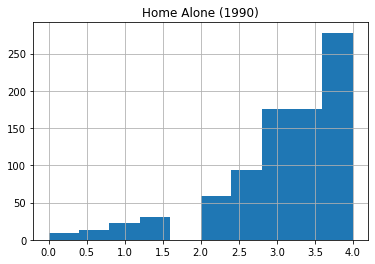

In [31]:
df.hist(column='Home Alone (1990)')

array([[<AxesSubplot:title={'center':'Finding Nemo (2003)'}>]],
      dtype=object)

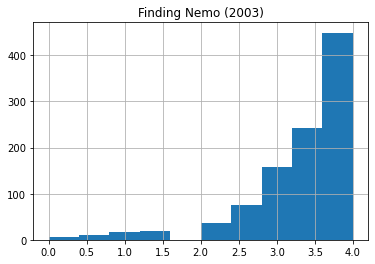

In [32]:
df.hist(column='Finding Nemo (2003)')

In [39]:
sc.stats.kstest(df['Finding Nemo (2003)'],df['Home Alone (1990)'])

KstestResult(statistic=0.1431175934366454, pvalue=3.2626485864491195e-10)

# Question 10

There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers?

Star Wars(6.94e-40), Harry Potter(0.118),The Matrix(1.75e-09), Indiana Jones(1.02e-11), Jurassic Park(1.85e-11), Pirates of the Caribbean(0.035), Toy Story(7.90e-06), Batman(4.13e-19)

We have used the Kruskal Wallis test since we are comparing 3+ groups at once. We can observe from the above values that the franchises of Star Wars, The Matrix, Indiana Jones, Jurassic Park, Toy Story, Batman have statistically significant results implying that we can conclude that viewers perceive the movies of the franchises to be of differing quality. On the other hand, Pirates of the Caribbean and Harry Potter are not statistically significant implying we have no reason to conclude that viewers perceive the movies to be of differing quality.


In [186]:
hp_1=df['Harry Potter and the Deathly Hallows: Part 2 (2011)']
hp_2=df['Harry Potter and the Goblet of Fire (2005)']
hp_3=df['Harry Potter and the Chamber of Secrets (2002)']
hp_4=df.iloc[:,230]

In [188]:
data = [hp_1,hp_2,hp_3,hp_4]

In [189]:
df3 = pd.concat(data, axis=1)

In [190]:
df3

,Harry Potter and the Deathly Hallows: Part 2 (2011),Harry Potter and the Goblet of Fire (2005),Harry Potter and the Chamber of Secrets (2002),Harry Potter and the Sorcerer's Stone (2001)
0,NaN,0.0,0.5,NaN
1,NaN,NaN,4.0,4.0
2,3.5,4.0,3.5,4.0
3,2.0,2.5,2.5,2.0
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1092,4.0,4.0,4.0,4.0
1093,4.0,3.5,3.5,4.0
1094,4.0,3.0,4.0,3.5
1095,NaN,3.0,2.5,3.0


In [198]:
p=df3.dropna(axis=0)
p

,Harry Potter and the Deathly Hallows: Part 2 (2011),Harry Potter and the Goblet of Fire (2005),Harry Potter and the Chamber of Secrets (2002),Harry Potter and the Sorcerer's Stone (2001)
2,3.5,4.0,3.5,4.0
3,2.0,2.5,2.5,2.0
5,4.0,4.0,4.0,4.0
7,4.0,4.0,4.0,4.0
13,4.0,3.5,4.0,4.0
...,...,...,...,...
1089,3.0,2.5,2.0,2.5
1092,4.0,4.0,4.0,4.0
1093,4.0,3.5,3.5,4.0
1094,4.0,3.0,4.0,3.5


In [197]:
sc.stats.kruskal(p.iloc[:,0],p.iloc[:,1],p.iloc[:,2],p.iloc[:,3])

KruskalResult(statistic=5.8739552218536755, pvalue=0.11790622831256074)

In [199]:
sw_1=df['Star Wars: Episode 1 - The Phantom Menace (1999)']
sw_2=df['Star Wars: Episode VII - The Force Awakens (2015)']
sw_3=df['Star Wars: Episode VI - The Return of the Jedi (1983)']
sw_4=df['Star Wars: Episode IV - A New Hope (1977)']
sw_5=df['Star Wars: Episode II - Attack of the Clones (2002)']
sw_6=df['Star Wars: Episode V - The Empire Strikes Back (1980)']

In [200]:
data1 = [sw_1,sw_2,sw_3,sw_4,sw_5,sw_6]

In [201]:
df2 = pd.concat(data1, axis=1)

In [202]:
d=df2.dropna(axis=0)
d

,Star Wars: Episode 1 - The Phantom Menace (1999),Star Wars: Episode VII - The Force Awakens (2015),Star Wars: Episode VI - The Return of the Jedi (1983),Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode II - Attack of the Clones (2002),Star Wars: Episode V - The Empire Strikes Back (1980)
3,0.0,2.5,4.0,4.0,0.0,4.0
5,4.0,4.0,4.0,4.0,3.5,4.0
7,4.0,4.0,4.0,3.0,4.0,4.0
9,4.0,4.0,4.0,4.0,2.0,4.0
19,0.0,3.0,3.0,4.0,0.0,4.0
...,...,...,...,...,...,...
1084,2.0,3.5,3.5,4.0,2.5,4.0
1086,4.0,4.0,3.5,4.0,4.0,4.0
1090,3.5,3.5,4.0,3.5,3.5,4.0
1093,4.0,4.0,4.0,4.0,3.0,3.5


In [203]:
sc.stats.kruskal(d.iloc[:,0],d.iloc[:,1],d.iloc[:,2],d.iloc[:,3],d.iloc[:,4],d.iloc[:,5])

KruskalResult(statistic=193.51026675400544, pvalue=6.940162236984522e-40)

In [204]:
m_1=df['The Matrix Revolutions (2003)']
m_2=df['The Matrix Reloaded (2003)']
m_3=df['The Matrix (1999)']

In [205]:
data2=[m_1,m_2,m_3]

In [206]:
df1 = pd.concat(data2, axis=1)

In [208]:
f=df1.dropna(axis=0)
f

,The Matrix Revolutions (2003),The Matrix Reloaded (2003),The Matrix (1999)
5,4.0,4.0,4.0
7,4.0,4.0,4.0
9,2.0,4.0,4.0
19,1.0,1.0,3.5
22,2.0,3.5,4.0
...,...,...,...
1086,2.5,2.5,3.5
1087,3.0,1.5,2.5
1088,1.5,1.5,2.5
1091,3.0,3.0,3.5


In [209]:
sc.stats.kruskal(f.iloc[:,0],f.iloc[:,1],f.iloc[:,2])

KruskalResult(statistic=40.32303905969196, pvalue=1.7537323830838066e-09)

In [210]:
i_1=df['Indiana Jones and the Last Crusade (1989)']
i_2=df['Indiana Jones and the Temple of Doom (1984)']
i_3=df['Indiana Jones and the Raiders of the Lost Ark (1981)']
i_4=df['Indiana Jones and the Kingdom of the Crystal Skull (2008)']

In [211]:
data3=[i_1,i_2,i_3,i_4]

In [212]:
df4 = pd.concat(data3, axis=1)

In [213]:
o=df4.dropna(axis=0)
o

,Indiana Jones and the Last Crusade (1989),Indiana Jones and the Temple of Doom (1984),Indiana Jones and the Raiders of the Lost Ark (1981),Indiana Jones and the Kingdom of the Crystal Skull (2008)
3,3.0,2.5,2.5,1.5
5,2.0,2.5,2.5,2.0
7,3.0,3.0,3.5,2.0
19,3.0,3.0,4.0,1.0
31,3.5,2.5,3.0,3.0
...,...,...,...,...
1085,2.0,2.5,3.5,3.5
1086,4.0,4.0,4.0,2.5
1087,1.0,3.0,2.5,2.0
1090,3.0,4.0,4.0,4.0


In [214]:
sc.stats.kruskal(o.iloc[:,0],o.iloc[:,1],o.iloc[:,2],o.iloc[:,3])

KruskalResult(statistic=54.19395477406098, pvalue=1.020118354785894e-11)

In [215]:
j_1=df['Jurassic Park (1993)']
j_2=df['The Lost World: Jurassic Park (1997)']
j_3=df['Jurassic Park III (2001)']

In [216]:
data4=[j_1,j_2,j_3]

In [217]:
df5 = pd.concat(data4, axis=1)

In [218]:
c=df5.dropna(axis=0)
c

,Jurassic Park (1993),The Lost World: Jurassic Park (1997),Jurassic Park III (2001)
5,3.5,3.5,1.5
7,4.0,4.0,3.5
13,4.0,3.5,3.5
15,4.0,4.0,4.0
16,2.0,2.0,2.0
...,...,...,...
1085,1.0,1.0,1.5
1086,4.0,4.0,3.5
1090,4.0,3.0,3.5
1091,3.0,3.0,3.0


In [219]:
sc.stats.kruskal(c.iloc[:,0],c.iloc[:,1],c.iloc[:,2])

KruskalResult(statistic=49.42733030275783, pvalue=1.8492328391686058e-11)

In [220]:
p_1=df.iloc[:,75]
p_2=df.iloc[:,204]
p_3=df['Pirates of the Caribbean: The Curse of the Black Pearl (2003)']

In [221]:
data5=[p_1,p_2,p_3]

In [222]:
df6 = pd.concat(data5, axis=1)

In [223]:
b=df6.dropna(axis=0)
b

,Pirates of the Caribbean: Dead Man's Chest (2006),Pirates of the Caribbean: At World's End (2007),Pirates of the Caribbean: The Curse of the Black Pearl (2003)
3,2.0,1.0,3.0
4,2.0,3.0,3.0
5,4.0,4.0,4.0
6,1.5,0.5,0.0
7,2.5,2.0,3.0
...,...,...,...
1087,4.0,4.0,4.0
1088,1.5,0.5,1.5
1090,3.5,3.5,4.0
1093,3.5,3.5,3.5


In [224]:
sc.stats.kruskal(b.iloc[:,0],b.iloc[:,1],b.iloc[:,2])

KruskalResult(statistic=6.660021086485515, pvalue=0.035792727694248905)

In [225]:
t_1=df['Toy Story 2 (1999)']
t_2=df['Toy Story 3 (2010)']
t_3=df['Toy Story (1995)']

In [226]:
data6=[t_1,t_2,t_3]

In [227]:
df7 = pd.concat(data6, axis=1)

In [228]:
a=df7.dropna(axis=0)
a

,Toy Story 2 (1999),Toy Story 3 (2010),Toy Story (1995)
0,3.0,3.0,4.0
1,1.0,4.0,3.0
3,3.0,3.0,3.0
5,1.5,1.0,3.0
11,3.5,3.5,4.0
...,...,...,...
1092,3.5,4.0,4.0
1093,3.5,4.0,3.5
1094,3.0,3.5,3.0
1095,2.5,3.5,3.0


In [229]:
sc.stats.kruskal(a.iloc[:,0],a.iloc[:,1],a.iloc[:,2])

KruskalResult(statistic=23.496729938969775, pvalue=7.902234665149812e-06)

In [230]:
b_1=df['Batman (1989)']
b_2=df['Batman: The Dark Knight (2008)']
b_3=df['Batman & Robin (1997)']

In [231]:
data7=[b_1,b_2,b_3]

In [232]:
df8 = pd.concat(data7, axis=1)

In [233]:
e=df8.dropna(axis=0)
e

,Batman (1989),Batman: The Dark Knight (2008),Batman & Robin (1997)
4,1.0,2.5,0.5
5,2.5,3.5,2.5
7,2.5,3.5,2.0
18,4.0,4.0,4.0
22,3.5,4.0,3.5
...,...,...,...
1065,3.5,3.5,0.0
1075,4.0,4.0,4.0
1081,3.0,4.0,3.0
1086,2.5,4.0,2.0


In [234]:
sc.stats.kruskal(e.iloc[:,0],e.iloc[:,1],e.iloc[:,2])

KruskalResult(statistic=84.65778425637279, pvalue=4.1380499020034183e-19)